<a href="https://colab.research.google.com/github/NoeSin/PrimerEntrega-Milozzi-Sincosky/blob/main/AnalisisBivariado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisis Bivariado

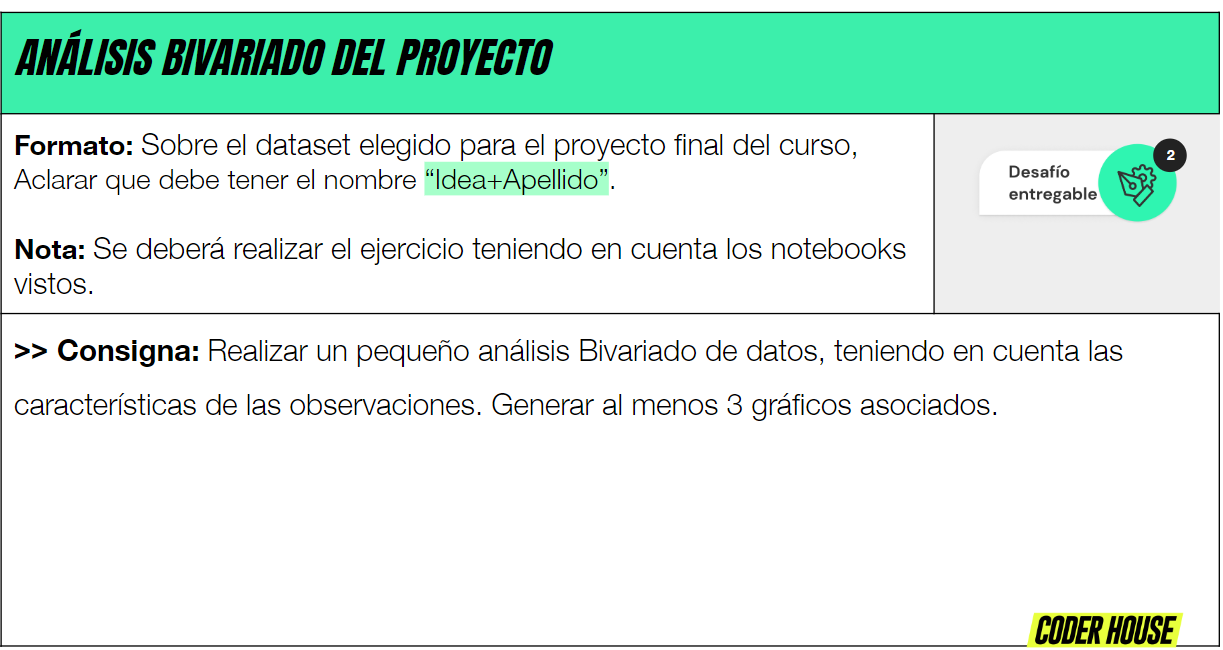

## Obtencion de datos y formateo.

In [ ]:
#Importamos las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd "/content/drive/MyDrive/DataScience/Entregables/Clase34"

/content/drive/MyDrive/DataScience/Entregables/Clase34


In [ ]:
df = pd.read_csv('clientes_productos.csv')
df

,Unnamed: 0,customer_id,age,gender,fecha_inicio,fecha_fin,duracion,activo,product_id,name,price,billing_cycle,duracion_int,range_age
0,0,C2448,76,female,2017-01-01,NaN,2046 days,True,prd_1,annual_subscription,1200,12,2046,"(75, 80]"
1,1,C2449,61,male,2017-01-01,2021-09-05,1708 days,False,prd_1,annual_subscription,1200,12,1708,"(60, 65]"
2,2,C2450,58,female,2017-01-01,2019-01-13,742 days,False,prd_1,annual_subscription,1200,12,742,"(55, 60]"
3,3,C2451,62,female,2017-01-01,NaN,2046 days,True,prd_2,monthly_subscription,125,1,2046,"(60, 65]"
4,4,C2452,71,male,2017-01-01,2021-06-28,1639 days,False,prd_1,annual_subscription,1200,12,1639,"(70, 75]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
508927,508927,C511375,53,male,2021-12-31,NaN,221 days,True,prd_2,monthly_subscription,125,1,221,"(50, 55]"
508928,508928,C511376,60,male,2021-12-31,NaN,221 days,True,prd_2,monthly_subscription,125,1,221,"(55, 60]"
508929,508929,C511377,67,female,2021-12-31,NaN,221 days,True,prd_2,monthly_subscription,125,1,221,"(65, 70]"
508930,508930,C511378,49,male,2021-12-31,NaN,221 days,True,prd_2,monthly_subscription,125,1,221,"(45, 50]"


In [ ]:
df.drop(["Unnamed: 0"],axis=1,inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508932 entries, 0 to 508931
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   customer_id    508932 non-null  object
 1   age            508932 non-null  int64 
 2   gender         508932 non-null  object
 3   fecha_inicio   508932 non-null  object
 4   fecha_fin      112485 non-null  object
 5   duracion       508932 non-null  object
 6   activo         508932 non-null  bool  
 7   product_id     508932 non-null  object
 8   name           508932 non-null  object
 9   price          508932 non-null  int64 
 10  billing_cycle  508932 non-null  int64 
 11  duracion_int   508932 non-null  int64 
 12  range_age      508932 non-null  object
dtypes: bool(1), int64(4), object(8)
memory usage: 47.1+ MB


In [ ]:
df['fecha_inicio']=df['fecha_inicio'].astype('datetime64')

In [ ]:
df['fecha_fin']=df['fecha_fin'].astype('datetime64')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508932 entries, 0 to 508931
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   customer_id    508932 non-null  object        
 1   age            508932 non-null  int64         
 2   gender         508932 non-null  object        
 3   fecha_inicio   508932 non-null  datetime64[ns]
 4   fecha_fin      112485 non-null  datetime64[ns]
 5   duracion       508932 non-null  object        
 6   activo         508932 non-null  bool          
 7   product_id     508932 non-null  object        
 8   name           508932 non-null  object        
 9   price          508932 non-null  int64         
 10  billing_cycle  508932 non-null  int64         
 11  duracion_int   508932 non-null  int64         
 12  range_age      508932 non-null  object        
dtypes: bool(1), datetime64[ns](2), int64(4), object(6)
memory usage: 47.1+ MB


In [ ]:
dfConCasos = pd.read_csv('clientes_productos_casos.csv')
dfConCasos

,Unnamed: 0,customer_id,age,gender,fecha_inicio,fecha_fin,duracion,activo,product_id,name,price,billing_cycle,case_id,date_time,channel,reason,indicador
0,0,C2448,76,female,2017-01-01 00:00:00,NaN,2046 days,True,prd_1,annual_subscription,1200,12,CC101,2017-01-01 10:32:03,phone,signup,both
1,1,C2449,61,male,2017-01-01 00:00:00,2021-09-05 00:00:00,1708 days,False,prd_1,annual_subscription,1200,12,CC102,2017-01-01 11:35:47,phone,signup,both
2,2,C2450,58,female,2017-01-01 00:00:00,2019-01-13 00:00:00,742 days,False,prd_1,annual_subscription,1200,12,CC103,2017-01-01 11:37:09,phone,signup,both
3,3,C2451,62,female,2017-01-01 00:00:00,NaN,2046 days,True,prd_2,monthly_subscription,125,1,CC104,2017-01-01 13:28:14,phone,signup,both
4,4,C2451,62,female,2017-01-01 00:00:00,NaN,2046 days,True,prd_2,monthly_subscription,125,1,CC4491,2017-03-31 12:06:58,phone,support,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580779,580779,C511375,53,male,2021-12-31 00:00:00,NaN,221 days,True,prd_2,monthly_subscription,125,1,NaN,NaN,NaN,NaN,left_only
580780,580780,C511376,60,male,2021-12-31 00:00:00,NaN,221 days,True,prd_2,monthly_subscription,125,1,NaN,NaN,NaN,NaN,left_only
580781,580781,C511377,67,female,2021-12-31 00:00:00,NaN,221 days,True,prd_2,monthly_subscription,125,1,NaN,NaN,NaN,NaN,left_only
580782,580782,C511378,49,male,2021-12-31 00:00:00,NaN,221 days,True,prd_2,monthly_subscription,125,1,NaN,NaN,NaN,NaN,left_only


In [ ]:
dfConCasos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580784 entries, 0 to 580783
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     580784 non-null  int64 
 1   customer_id    580784 non-null  object
 2   age            580784 non-null  int64 
 3   gender         580784 non-null  object
 4   fecha_inicio   580784 non-null  object
 5   fecha_fin      129593 non-null  object
 6   duracion       580784 non-null  object
 7   activo         580784 non-null  bool  
 8   product_id     580784 non-null  object
 9   name           580784 non-null  object
 10  price          580784 non-null  int64 
 11  billing_cycle  580784 non-null  int64 
 12  case_id        330512 non-null  object
 13  date_time      330512 non-null  object
 14  channel        330512 non-null  object
 15  reason         330512 non-null  object
 16  indicador      580784 non-null  object
dtypes: bool(1), int64(4), object(12)
memory usage: 7

In [ ]:
dfConCasos.drop(["Unnamed: 0"],axis=1,inplace=True)
dfConCasos['fecha_inicio']=dfConCasos['fecha_inicio'].astype('datetime64')
dfConCasos['fecha_fin']=dfConCasos['fecha_fin'].astype('datetime64')
dfConCasos['date_time']=dfConCasos['date_time'].astype('datetime64')
dfConCasos.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580784 entries, 0 to 580783
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   customer_id    580784 non-null  object        
 1   age            580784 non-null  int64         
 2   gender         580784 non-null  object        
 3   fecha_inicio   580784 non-null  datetime64[ns]
 4   fecha_fin      129593 non-null  datetime64[ns]
 5   duracion       580784 non-null  object        
 6   activo         580784 non-null  bool          
 7   product_id     580784 non-null  object        
 8   name           580784 non-null  object        
 9   price          580784 non-null  int64         
 10  billing_cycle  580784 non-null  int64         
 11  case_id        330512 non-null  object        
 12  date_time      330512 non-null  datetime64[ns]
 13  channel        330512 non-null  object        
 14  reason         330512 non-null  object        
 15  

In [ ]:
dfConCasos.describe(include='all',datetime_is_numeric=True)

,customer_id,age,gender,fecha_inicio,fecha_fin,duracion,activo,product_id,name,price,billing_cycle,case_id,date_time,channel,reason,indicador
count,580784,580784.000000,580784,580784,129593,580784,580784,580784,580784,580784.000000,580784.000000,330512,330512,330512,330512,580784
unique,508932,NaN,2,NaN,NaN,2046,2,2,2,NaN,NaN,330512,NaN,2,2,2
top,C20510,NaN,male,NaN,NaN,582 days,True,prd_1,annual_subscription,NaN,NaN,CC101,NaN,phone,support,both
freq,5,NaN,349454,NaN,NaN,1158,451191,354529,354529,NaN,NaN,1,NaN,286840,200985,330512
mean,NaN,58.341015,NaN,2020-02-15 03:50:47.588088064,2020-09-29 00:55:22.179438592,NaN,NaN,NaN,NaN,781.214143,7.714749,NaN,2020-05-10 03:17:34.812911360,NaN,NaN,NaN
min,NaN,21.000000,NaN,2017-01-01 00:00:00,2017-01-08 00:00:00,NaN,NaN,NaN,NaN,125.000000,1.000000,NaN,2017-01-01 10:32:03,NaN,NaN,NaN
25%,NaN,53.000000,NaN,2019-04-15 00:00:00,2020-03-01 00:00:00,NaN,NaN,NaN,NaN,125.000000,1.000000,NaN,2019-06-30 16:11:01.249999872,NaN,NaN,NaN
50%,NaN,59.000000,NaN,2020-04-29 00:00:00,2020-12-31 00:00:00,NaN,NaN,NaN,NaN,1200.000000,12.000000,NaN,2020-08-07 13:42:24,NaN,NaN,NaN
75%,NaN,64.000000,NaN,2021-03-11 00:00:00,2021-07-23 00:00:00,NaN,NaN,NaN,NaN,1200.000000,12.000000,NaN,2021-06-06 14:11:54.500000,NaN,NaN,NaN
max,NaN,78.000000,NaN,2021-12-31 00:00:00,2021-12-31 00:00:00,NaN,NaN,NaN,NaN,1200.000000,12.000000,NaN,2022-01-01 06:32:53,NaN,NaN,NaN


In [ ]:
df.activo = df.activo.replace({False:'Baja',True:'Activo'})
dfConCasos.activo = dfConCasos.activo.replace({False:'Baja',True:'Activo'})

In [ ]:
df[['fecha_fin','activo']]

,fecha_fin,activo
0,NaT,Activo
1,2021-09-05,Baja
2,2019-01-13,Baja
3,NaT,Activo
4,2021-06-28,Baja
...,...,...
508927,NaT,Activo
508928,NaT,Activo
508929,NaT,Activo
508930,NaT,Activo


In [ ]:
from datetime import date
dfConCasos['fin_calculo'] = dfConCasos['fecha_fin'].fillna(date.today()).astype('datetime64').dt.date.astype('datetime64')
dfConCasos['duracion_meses'] = ((dfConCasos.fin_calculo - dfConCasos.fecha_inicio)/np.timedelta64(1, 'M'))
dfConCasos['duracion_meses'] = dfConCasos['duracion_meses'].astype(int)
dfConCasos.drop(['fin_calculo'],axis=1 ,inplace=True  )
dfConCasos.head()

,customer_id,age,gender,fecha_inicio,fecha_fin,duracion,activo,product_id,name,price,billing_cycle,case_id,date_time,channel,reason,indicador,duracion_meses
0,C2448,76,female,2017-01-01,NaT,2046 days,Activo,prd_1,annual_subscription,1200,12,CC101,2017-01-01 10:32:03,phone,signup,both,67
1,C2449,61,male,2017-01-01,2021-09-05,1708 days,Baja,prd_1,annual_subscription,1200,12,CC102,2017-01-01 11:35:47,phone,signup,both,56
2,C2450,58,female,2017-01-01,2019-01-13,742 days,Baja,prd_1,annual_subscription,1200,12,CC103,2017-01-01 11:37:09,phone,signup,both,24
3,C2451,62,female,2017-01-01,NaT,2046 days,Activo,prd_2,monthly_subscription,125,1,CC104,2017-01-01 13:28:14,phone,signup,both,67
4,C2451,62,female,2017-01-01,NaT,2046 days,Activo,prd_2,monthly_subscription,125,1,CC4491,2017-03-31 12:06:58,phone,support,both,67


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508932 entries, 0 to 508931
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   customer_id    508932 non-null  object        
 1   age            508932 non-null  int64         
 2   gender         508932 non-null  object        
 3   fecha_inicio   508932 non-null  datetime64[ns]
 4   fecha_fin      112485 non-null  datetime64[ns]
 5   duracion       508932 non-null  object        
 6   activo         508932 non-null  object        
 7   product_id     508932 non-null  object        
 8   name           508932 non-null  object        
 9   price          508932 non-null  int64         
 10  billing_cycle  508932 non-null  int64         
 11  duracion_int   508932 non-null  int64         
 12  range_age      508932 non-null  object        
dtypes: datetime64[ns](2), int64(4), object(7)
memory usage: 50.5+ MB


In [ ]:
#from datetime import date
df['fin_calculo'] = df['fecha_fin'].fillna(date.today()).astype('datetime64').dt.date.astype('datetime64')
df['duracion_meses'] = ((df.fin_calculo - df.fecha_inicio)/np.timedelta64(1, 'M'))
df['duracion_meses'] = df['duracion_meses'].astype(int)
df.drop(['fin_calculo'],axis=1 ,inplace=True  )
df.head()

,customer_id,age,gender,fecha_inicio,fecha_fin,duracion,activo,product_id,name,price,billing_cycle,duracion_int,range_age,duracion_meses
0,C2448,76,female,2017-01-01,NaT,2046 days,Activo,prd_1,annual_subscription,1200,12,2046,"(75, 80]",67
1,C2449,61,male,2017-01-01,2021-09-05,1708 days,Baja,prd_1,annual_subscription,1200,12,1708,"(60, 65]",56
2,C2450,58,female,2017-01-01,2019-01-13,742 days,Baja,prd_1,annual_subscription,1200,12,742,"(55, 60]",24
3,C2451,62,female,2017-01-01,NaT,2046 days,Activo,prd_2,monthly_subscription,125,1,2046,"(60, 65]",67
4,C2452,71,male,2017-01-01,2021-06-28,1639 days,Baja,prd_1,annual_subscription,1200,12,1639,"(70, 75]",53


In [ ]:
c = dfConCasos.groupby(['customer_id','age','gender','fecha_inicio','duracion_meses','activo','name'])['case_id'].count()
callsXCliente = pd.DataFrame(c).reset_index()
callsXCliente.rename(columns={'case_id':'cant_llamados'},inplace=True)
callsXCliente

,customer_id,age,gender,fecha_inicio,duracion_meses,activo,name,cant_llamados
0,C10000,46,female,2017-07-09,61,Activo,annual_subscription,2
1,C100000,54,female,2021-02-13,17,Activo,monthly_subscription,2
2,C100001,27,female,2021-02-13,17,Activo,annual_subscription,1
3,C100002,47,female,2021-02-13,17,Activo,annual_subscription,1
4,C100003,63,female,2021-02-13,17,Activo,annual_subscription,1
...,...,...,...,...,...,...,...,...
508927,C99995,42,female,2021-02-13,17,Activo,monthly_subscription,2
508928,C99996,61,female,2021-02-13,17,Activo,monthly_subscription,2
508929,C99997,44,male,2021-02-13,17,Activo,monthly_subscription,3
508930,C99998,74,male,2021-02-13,17,Activo,annual_subscription,1


Los datos estan normalizados, para el analisis los obtuvimos en el entregable anterior.
https://colab.research.google.com/drive/1onqVNR8evjH_Bkq-6-F1LBb9CntF68Ut?usp=sharing


## Graficos Bivariados de los datos:

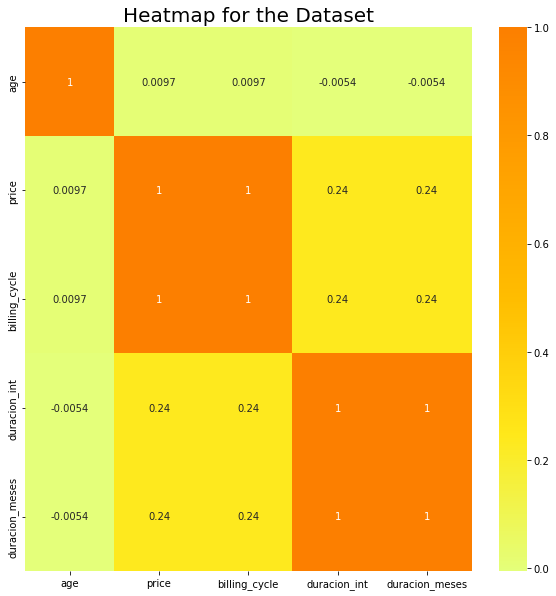

In [ ]:
#Hagamos un HeatMap del df
plt.rcParams['figure.figsize'] = (10, 10)

sns.heatmap(df.corr(), annot = True, cmap = 'Wistia')
plt.title('Heatmap for the Dataset', fontsize = 20)
plt.show()

Vemos que el precio está directamente relacionado co el billing_cycle y es correcto porque son informacion del producto y se repite por producto, podriamos quitar uno del análisis.

El resto de los datos no posee correlaciones fuertes.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


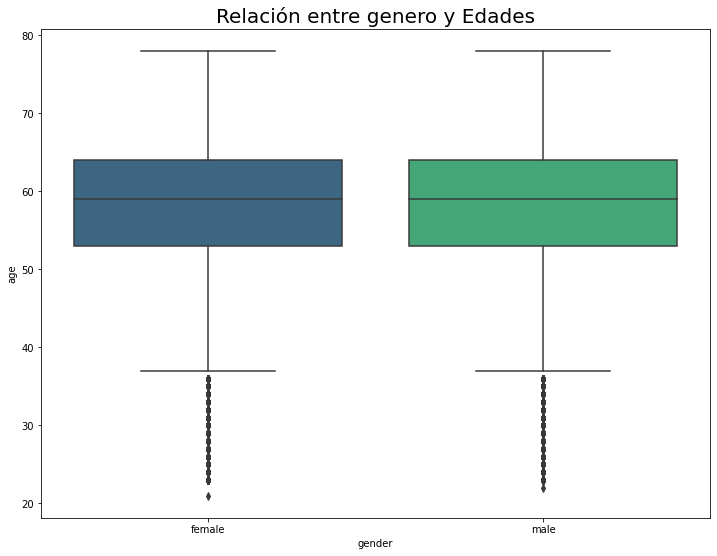

In [ ]:
# edades de usuarios por genero
plt.rcParams['figure.figsize'] = (12, 9)
sns.boxplot(df['gender'], df['age'], palette = 'viridis')
plt.title('Relación entre genero y Edades', fontsize = 20)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


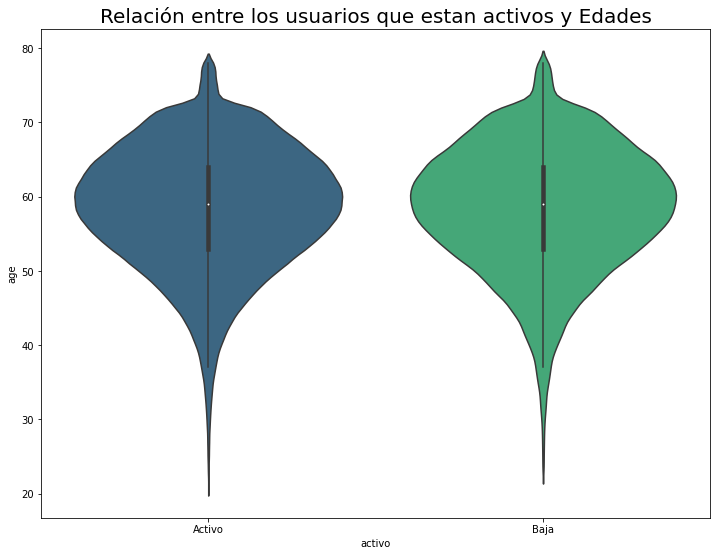

In [ ]:
# edades de usuarios por si se mantienen activos o no
plt.rcParams['figure.figsize'] = (12, 9)
sns.violinplot(df['activo'], df['age'], palette = 'viridis')
plt.title('Relación entre los usuarios que estan activos y Edades', fontsize = 20)
plt.show()

Las edades no parecen variar en los clientes ni por genero ni tener influencia en la baja de suscripciones.

In [ ]:

#Ejemplo: Categórica vs. categórica
dfc =pd.crosstab(dfConCasos.activo, dfConCasos.channel)
dfc.loc['Total',:]= dfc.sum(axis=0)
dfc.loc[:,'Row_Total'] = dfc.sum( axis=1)
a=dfc.T
a

activo,Activo,Baja,Total
channel,,,
email,34942.0,8730.0,43672.0
phone,218884.0,67956.0,286840.0
Row_Total,253826.0,76686.0,330512.0


In [ ]:
a['prop']= a.Baja / a.Total * 100
a

activo,Activo,Baja,Total,prop
channel,,,,
email,34942.0,8730.0,43672.0,19.989925
phone,218884.0,67956.0,286840.0,23.691256
Row_Total,253826.0,76686.0,330512.0,23.202183


La mayoria de usuarios que dieron de baja las suscripciones, se contactaron al call center por telefono.
En proporcion 
De los usuarios que se contactaron por email el 19,9% se dio de baja
De los usuarios que se contactaron por telefono el 23% se dio de baja.

In [ ]:
#Ejemplo: Categórica vs. categórica
dfc=pd.DataFrame(pd.crosstab(df.activo, df.name))
dfc.reset_index()
dfc

name,annual_subscription,monthly_subscription
activo,,
Activo,255967,140480
Baja,69682,42803


In [ ]:
dfc.loc['Total',:]= dfc.sum(axis=0)
dfc.loc[:,'Row_Total'] = dfc.sum( axis=1)
a=dfc.T
a

activo,Activo,Baja,Total
name,,,
annual_subscription,255967.0,69682.0,325649.0
monthly_subscription,140480.0,42803.0,183283.0
Row_Total,396447.0,112485.0,508932.0


In [ ]:
a['prop']= a.Baja / a.Total


In [ ]:
a

activo,Activo,Baja,Total,prop
name,,,,
annual_subscription,255967.0,69682.0,325649.0,0.213979
monthly_subscription,140480.0,42803.0,183283.0,0.233535
Row_Total,396447.0,112485.0,508932.0,0.221022


La suscripcion anual tuvo un 21% de bajas y la mensual un 23%

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


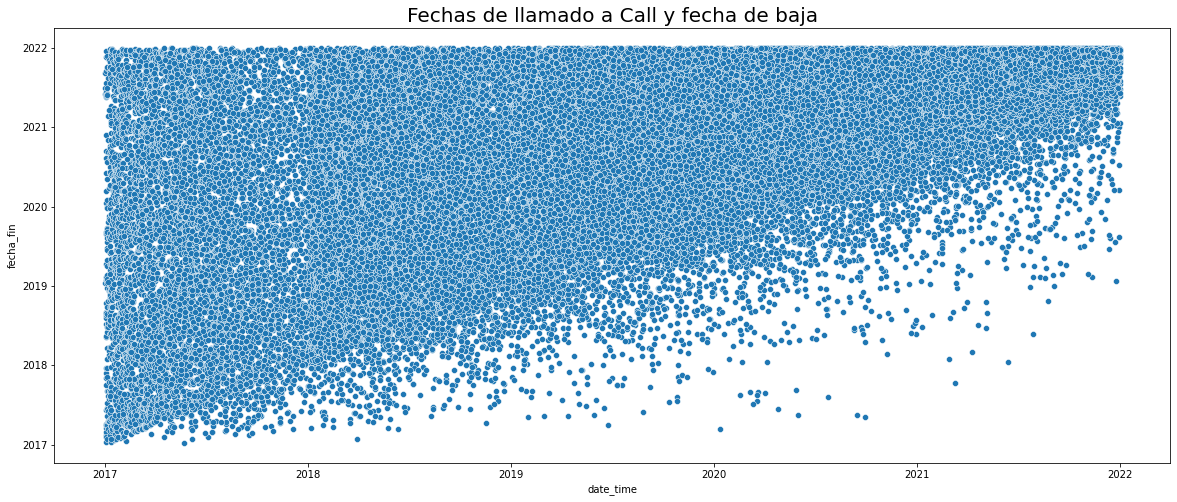

In [ ]:
plt.figure(figsize=(20,8))
sns.scatterplot(dfConCasos['date_time'], dfConCasos['fecha_fin'])
plt.title('Fechas de llamado a Call y fecha de baja', fontsize = 20)
plt.show()

La linea a 45 grado muestras contactos con coll center y el mismo dia se da de 
baja, los puntos que estan por debajo de esa linea parecen representar que el cliente llamó posteriormente a darse de baja.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


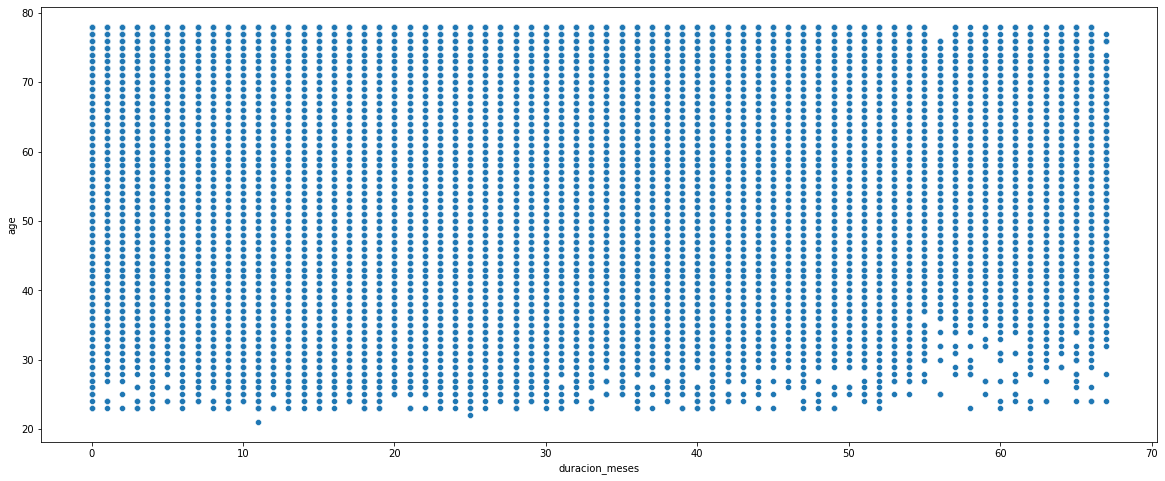

In [ ]:
plt.figure(figsize=(20,8))
sns.scatterplot(df['duracion_meses'], df['age'])

La edad de los usuarios parece no tener impacto directo en la permanencia con el producto (duracion_meses)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Duracion en meses de clientes por cantidad de llamados')

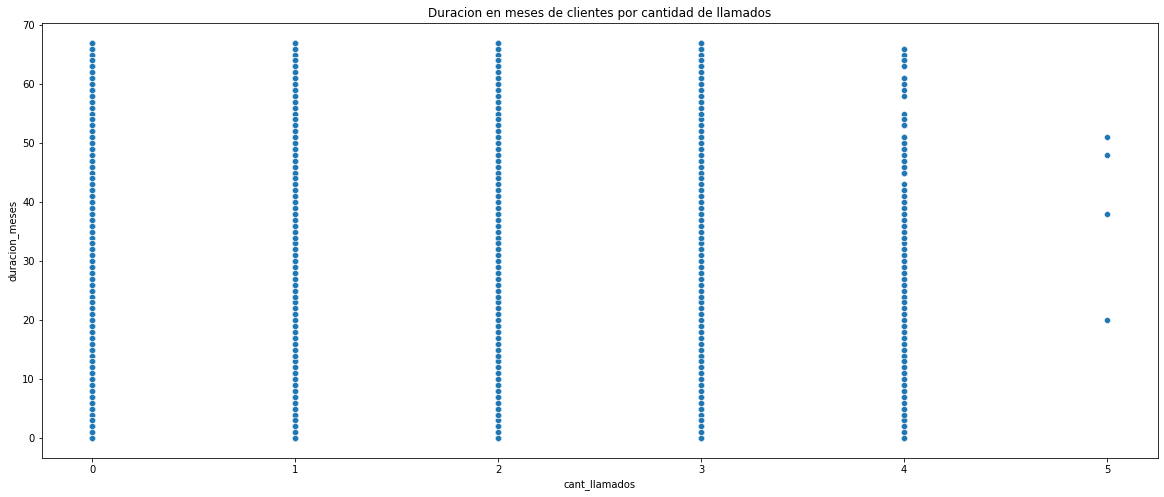

In [ ]:
plt.figure(figsize=(20,8))
sns.scatterplot(callsXCliente['cant_llamados'], callsXCliente['duracion_meses'])
plt.title('Duracion en meses de clientes por cantidad de llamados')


Vemos que la duracion en meses de los clientes que han llamado menos de 4 veces es similar, y son muy pocos los clientes que han llamado 5 veces, no existen clientes con mayor cantidad de llamados.

<Figure size 1440x1080 with 0 Axes>

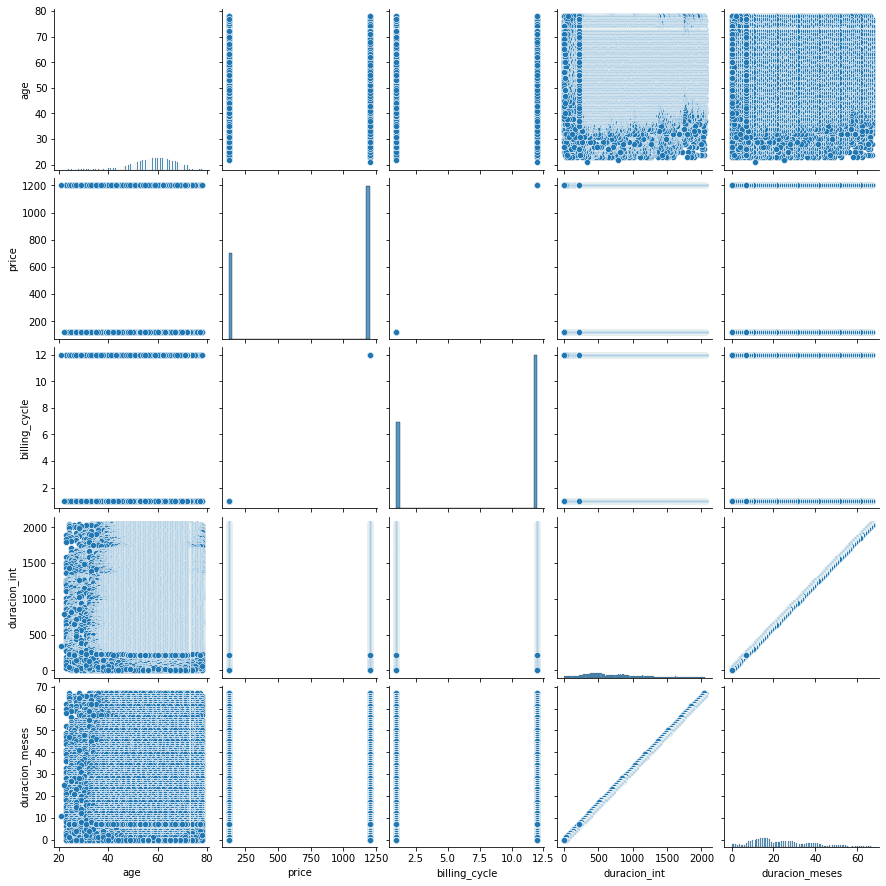

In [ ]:
#Crear un Pairplot del dataset
plt.figure(dpi=120)
sns.pairplot(df)
plt.show()

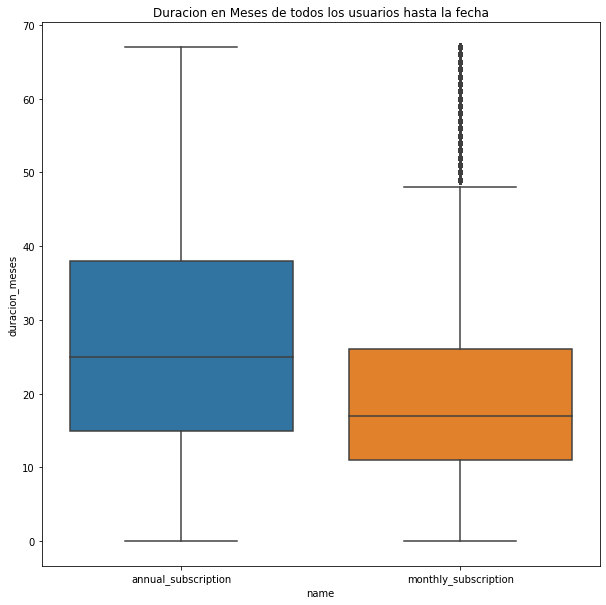

In [ ]:
#Boxplot
plt.figure(figsize=(10,10)) #defino el tamaño del grafico
sns.boxplot(y = 'duracion_meses', x = 'name', data = df)
plt.title('Duracion en Meses de todos los usuarios hasta la fecha')
plt.show()

La duracion en meses minima para suscripciones anuales es 12 (tiene logica lo menos que dura es el año de la suscripcion)
En las suscripciones mensuales la duracion minima es taproximadamente 12 tambien, en la suscripcion mensual se ven valores superiores que podrian ser outliers. este grafico tiene tanto usuarios de baja como usuarios que todavia tienen el producto, puede estar infiriendo la duracion de usuarios activos.

In [ ]:
df_bajas = df.loc[df['activo']=='Baja']
df_bajas

,customer_id,age,gender,fecha_inicio,fecha_fin,duracion,activo,product_id,name,price,billing_cycle,duracion_int,range_age,duracion_meses
1,C2449,61,male,2017-01-01,2021-09-05,1708 days,Baja,prd_1,annual_subscription,1200,12,1708,"(60, 65]",56
2,C2450,58,female,2017-01-01,2019-01-13,742 days,Baja,prd_1,annual_subscription,1200,12,742,"(55, 60]",24
4,C2452,71,male,2017-01-01,2021-06-28,1639 days,Baja,prd_1,annual_subscription,1200,12,1639,"(70, 75]",53
6,C2454,53,male,2017-01-01,2021-06-01,1612 days,Baja,prd_1,annual_subscription,1200,12,1612,"(50, 55]",52
8,C2456,70,female,2017-01-02,2017-06-08,157 days,Baja,prd_1,annual_subscription,1200,12,157,"(65, 70]",5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505733,C508181,71,male,2021-12-14,2021-12-18,4 days,Baja,prd_2,monthly_subscription,125,1,4,"(70, 75]",0
505955,C508403,56,female,2021-12-14,2021-12-20,6 days,Baja,prd_1,annual_subscription,1200,12,6,"(55, 60]",0
506383,C508831,69,male,2021-12-17,2021-12-19,2 days,Baja,prd_1,annual_subscription,1200,12,2,"(65, 70]",0
507442,C509890,67,male,2021-12-23,2021-12-28,5 days,Baja,prd_2,monthly_subscription,125,1,5,"(65, 70]",0


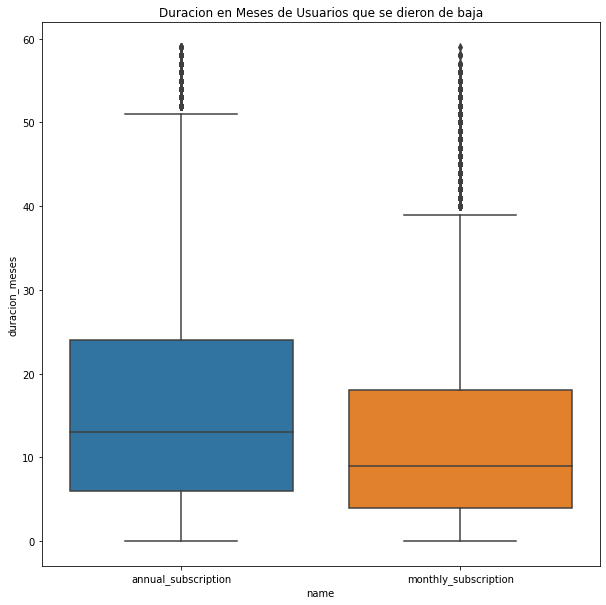

In [ ]:
#Boxplot
plt.figure(figsize=(10,10)) #defino el tamaño del grafico
sns.boxplot(y = 'duracion_meses', x = 'name', data = df_bajas)
plt.title('Duracion en Meses de Usuarios que se dieron de baja')
plt.show()

In [ ]:
import pandas_profiling

In [ ]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 
from pandas_profiling import ProfileReport
profile = ProfileReport(df, title='Mi Proyecto', html={'style':{'full_width':True}})
profile.to_notebook_iframe()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]